# Predicting Time Series with LSTMs
Kyle Kulas

Tutorial:https://heartbeat.comet.ml/using-a-keras-long-shortterm-memory-lstm-model-to-predict-stock-prices-a08c9f69aa74

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
dataset_train = pd.read_csv('data/NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:,1:2].values
training_set.shape

(2035, 1)

## Feature Scaling

In [3]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## Creating Data with Timesteps

In [14]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    

X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(1975, 60)
(1975, 60, 1)


In [5]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


2022-01-05 00:35:02.059538: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-05 00:35:02.059640: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-05 00:35:02.059670: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bb0e80c14a3d): /proc/driver/nvidia/version does not exist
2022-01-05 00:35:02.068487: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-05 00:35:03.128082: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the M

Epoch 1/100
62/62 [==============================] - 23s 265ms/step - loss: 0.0140
Epoch 2/100
62/62 [==============================] - 16s 257ms/step - loss: 0.0031
Epoch 3/100
62/62 [==============================] - 16s 259ms/step - loss: 0.0029
Epoch 4/100
62/62 [==============================] - 15s 249ms/step - loss: 0.0028
Epoch 5/100
62/62 [==============================] - 16s 252ms/step - loss: 0.0024
Epoch 6/100
62/62 [==============================] - 16s 258ms/step - loss: 0.0023
Epoch 7/100
62/62 [==============================] - 16s 253ms/step - loss: 0.0021
Epoch 8/100
62/62 [==============================] - 16s 263ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 16s 251ms/step - loss: 0.0020
Epoch 10/100
62/62 [==============================] - 15s 245ms/step - loss: 0.0018
Epoch 11/100
62/62 [==============================] - 16s 253ms/step - loss: 0.0017
Epoch 12/100
62/62 [==============================] - 16s 252ms/step - loss: 0.0018
E

In [7]:
dataset_test = pd.read_csv('data/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [8]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

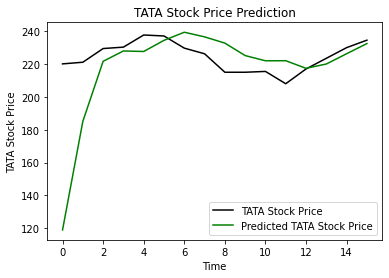

In [9]:

plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()